Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
Limpeza e tratamento de dados

In [28]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [29]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85,FALSO,nao
1,sol,80,90,VERDADEIRO,nao
2,nublado,83,86,FALSO,sim
3,chuva,70,FALSO,sim,NaN
4,chuva,68,80,FALSO,sim


In [30]:
#explorar dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<AxesSubplot:xlabel='Aparencia'>

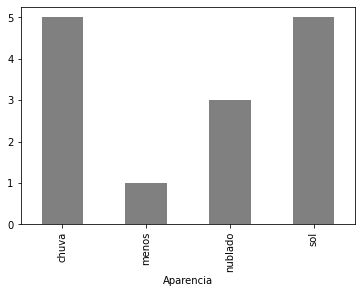

In [31]:
agrupado.plot.bar(color = 'gray')

In [32]:
#aparencia
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         6
VERDADEIRO    6
sim           2
dtype: int64

<AxesSubplot:xlabel='Vento'>

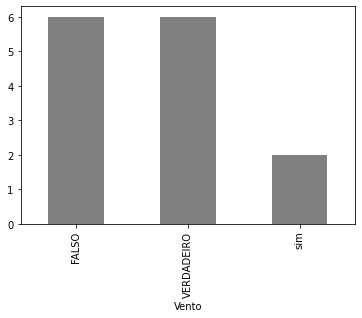

In [33]:
agrupado.plot.bar(color = 'gray')

In [34]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    7
dtype: int64

<AxesSubplot:xlabel='Jogar'>

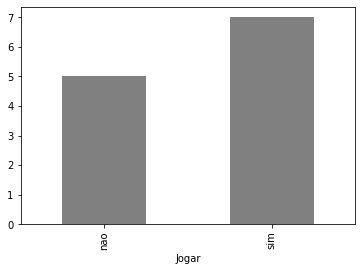

In [35]:
agrupado.plot.bar(color = 'gray')

In [36]:
#explorar colunas numéricas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

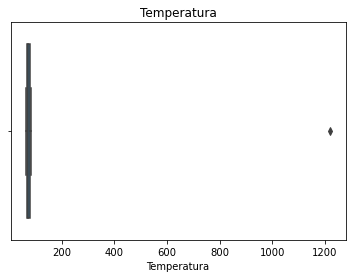

In [37]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

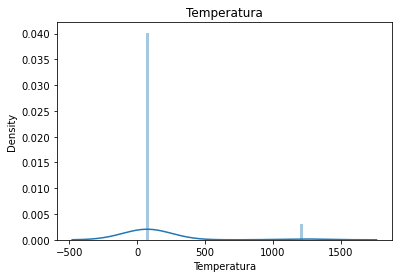

In [38]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [39]:
#Umidade
dataset['Umidade'].describe()

count     14
unique    11
top       70
freq       3
Name: Umidade, dtype: object

In [40]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

C:\Users\fabio\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'FALSO'

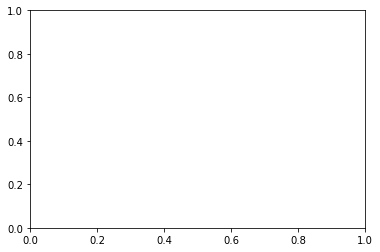

In [16]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [41]:
#contamos valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          2
dtype: int64

In [42]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [43]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "Sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [44]:
#temperatura fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [45]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95,FALSO,nao


In [46]:
#calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [47]:
#substituir
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

In [48]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [49]:
#umidade, dominio e NAs
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
200      1
65       1
70       3
75       1
80       1
85       1
86       1
90       2
91       1
95       1
FALSO    1
dtype: int64

In [52]:
#total de Nas
dataset['Umidade'].isnull().sum()

0

In [51]:
#calular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [53]:
#preenche NAs
dataset['Umidade'].fillna(mediana, inplace=True)

In [54]:
dataset['Umidade'].isnull().sum()

0

In [63]:
#visuliza de acordo com o dominio de acordo com o dominio
dataset.loc[(dataset['Umidade'] < 0 ) | (dataset['Umidade'] > 100)]

TypeError: '<' not supported between instances of 'str' and 'int'

In [56]:
#atualiza comm mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

TypeError: '<' not supported between instances of 'str' and 'int'

In [57]:
#visuliza novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

TypeError: '<' not supported between instances of 'str' and 'int'

In [58]:
#Vemtos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         6
VERDADEIRO    6
sim           2
dtype: int64

In [59]:
#total de Nas
dataset['Vento'].isnull().sum()

0

In [60]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace=True)

In [61]:
#total de Nas
dataset['Vento'].isnull().sum()

0